In [83]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [84]:
def update_weights(X,W):
    for x in X:
        W += np.outer(x,x)
    #for i in range(W.shape[0]):
    #    W[i,i] = 0
    return W

def recall(x,W):
    x_ = x.reshape((-1,1))
    for i in range(x_.shape[0]):
        x_[i] = np.sign(np.dot(x_.T,W[i,:]))
    return x_

def find_pattern(x, W, epochs):
    x_out = x.copy()
    for i in range(epochs):
        x_out = recall(x_out,W)
    return x_out


# 3.1.1

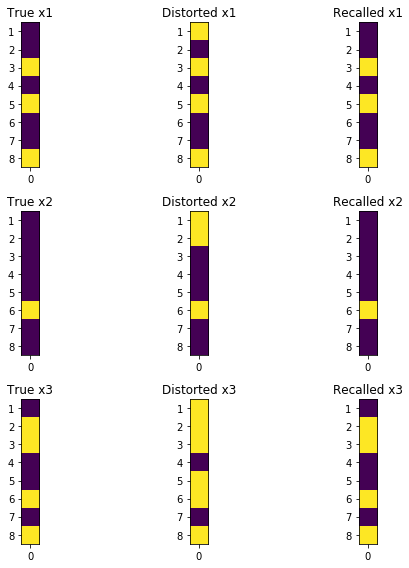

In [85]:

x1=np.array((-1,-1, 1,-1, 1,-1,-1, 1))
x2=np.array((-1, -1, -1, -1, -1, 1, -1, -1))
x3=np.array((-1, 1, 1,-1,-1, 1,-1, 1))

W = np.zeros((x1.shape[0],x1.shape[0]))
X = np.vstack((x1,x2,x3))
W = update_weights(X,W)
x1d=np.array((1,-1, 1,-1, 1,-1,-1, 1))
x2d=np.array((1, 1,-1,-1,-1, 1,-1,-1))
x3d=np.array((1, 1, 1,-1, 1, 1,-1, 1))
epochs = 3

x1r = find_pattern(x1d,W,epochs)
x2r = find_pattern(x2d,W,epochs)
x3r = find_pattern(x3d,W,epochs)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)

ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)

ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

ax1.imshow(x1.reshape((x1.shape[0],1)))
ax1.set_yticks(np.arange(8))
ax1.set_yticklabels(np.arange(1,9))
ax1.set_xticks([0])
ax1.set_xticklabels([0])
ax1.set_title('True x1')

ax2.imshow(x1d.reshape((x1d.shape[0],1)))
ax2.set_yticks(np.arange(8))
ax2.set_yticklabels(np.arange(1,9))
ax2.set_xticks([0])
ax2.set_xticklabels([0])
ax2.set_title('Distorted x1')

ax3.imshow(x1r.reshape((x1r.shape[0],1)))
ax3.set_yticks(np.arange(8))
ax3.set_yticklabels(np.arange(1,9))
ax3.set_xticks([0])
ax3.set_xticklabels([0])
ax3.set_title('Recalled x1')

ax4.imshow(x2.reshape((x2.shape[0],1)))
ax4.set_yticks(np.arange(8))
ax4.set_yticklabels(np.arange(1,9))
ax4.set_xticks([0])
ax4.set_xticklabels([0])
ax4.set_title('True x2')

ax5.imshow(x2d.reshape((x2d.shape[0],1)))
ax5.set_yticks(np.arange(8))
ax5.set_yticklabels(np.arange(1,9))
ax5.set_xticks([0])
ax5.set_xticklabels([0])
ax5.set_title('Distorted x2')

ax6.imshow(x2r.reshape((x2r.shape[0],1)))
ax6.set_yticks(np.arange(8))
ax6.set_yticklabels(np.arange(1,9))
ax6.set_xticks([0])
ax6.set_xticklabels([0])
ax6.set_title('Recalled x2')

ax7.imshow(x3.reshape((x3.shape[0],1)))
ax7.set_yticks(np.arange(8))
ax7.set_yticklabels(np.arange(1,9))
ax7.set_xticks([0])
ax7.set_xticklabels([0])
ax7.set_title('True x3')

ax8.imshow(x3d.reshape((x3d.shape[0],1)))
ax8.set_yticks(np.arange(8))
ax8.set_yticklabels(np.arange(1,9))
ax8.set_xticks([0])
ax8.set_xticklabels([0])
ax8.set_title('Distorted x3')

ax9.imshow(x3r.reshape((x3r.shape[0],1)))
ax9.set_yticks(np.arange(8))
ax9.set_yticklabels(np.arange(1,9))
ax9.set_xticks([0])
ax9.set_xticklabels([0])
ax9.set_title('Recalled x3')

plt.tight_layout()
plt.show()


# 3.1.2

In [86]:
def generate_input_vectors(n):
    out = np.zeros((8,256))
    
    for i in range(1<<n):
        s=bin(i)[2:]
        s='0'*(n-len(s))+s
        s = list(s)
        s = np.array(s,dtype=np.int32)
        out[:,i] = s.T
    z_ind = np.argwhere(out == 0)
    
    for ind in z_ind:
        out[ind[0],ind[1]] = -1
    return out



def run_network(X,W,epochs):
    saved_patterns = np.array((8,1))
    
    for i,column in enumerate(X.T):
        x = find_pattern(column,W,epochs)
        exists = False

        if i == 0:
            x = x.reshape((-1,1))
            saved_patterns = x
        else:
            for saved_column in saved_patterns.T:
                saved_column = saved_column.reshape((-1,1))
                if (saved_column - x).any() == False:
                    exists = True
            if exists != True:
                x = x.reshape((-1,1))
                saved_patterns = np.append(saved_patterns,x,axis=1)
    return saved_patterns


epochs = 10

x1=np.array((-1,-1, 1,-1, 1,-1,-1, 1))
x2=np.array((-1,-1,-1,-1,-1, 1,-1,-1))
x3=np.array((-1, 1, 1,-1,-1, 1,-1, 1))

W = np.zeros((x1.shape[0],x1.shape[0]))

X = np.vstack((x1,x2,x3))
W = update_weights(X,W)

X = generate_input_vectors(x1.shape[0])
X = np.array(X)

unique = np.unique(X,axis=1)
print('From '+str(unique.shape[1])+' unique patterns')

s = run_network(X,W,epochs)

print(str(s.shape[1])+' where attractors:')
print(s)

From 256 unique patterns
10 where attractors:
[[-1. -1. -1. -1.  1.  1. -1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1.  1.  1. -1. -1. -1.  1.  1. -1.  1.]
 [-1. -1. -1. -1.  1.  1. -1.  1.  1.  1.]
 [-1.  1. -1.  1.  1. -1. -1.  1.  1. -1.]
 [ 1. -1.  1. -1. -1.  1.  1. -1. -1.  1.]
 [-1. -1. -1. -1.  1.  1. -1.  1.  1.  1.]
 [-1.  1.  1. -1. -1. -1.  1.  1. -1.  1.]]


### 3.1.3

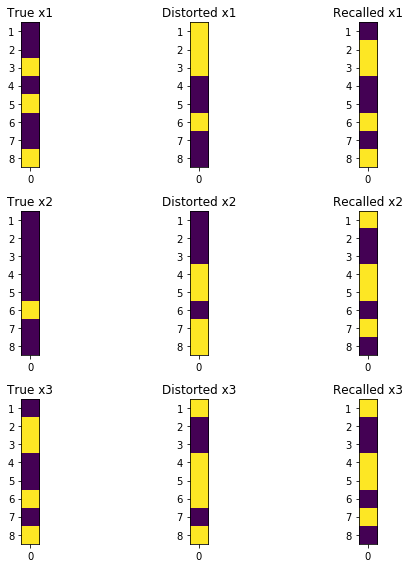

In [87]:
x1=np.array((-1,-1, 1,-1, 1,-1,-1, 1))
x2=np.array((-1,-1,-1,-1,-1, 1,-1,-1))
x3=np.array((-1, 1, 1,-1,-1, 1,-1, 1))

x1d=np.array((1, 1, 1,-1,-1, 1,-1,-1))
x2d=np.array((-1,-1,-1,1, 1,-1, 1, 1))
x3d=np.array((1,-1,-1, 1, 1, 1,-1, 1))

x1=np.array((-1,-1, 1,-1, 1,-1,-1, 1))
x2=np.array((-1, -1, -1, -1, -1, 1, -1, -1))
x3=np.array((-1, 1, 1,-1,-1, 1,-1, 1))

W = np.zeros((x1.shape[0],x1.shape[0]))
X = np.vstack((x1,x2,x3))
W = update_weights(X,W)

epochs = 3

x1r = find_pattern(x1d,W,epochs)
x2r = find_pattern(x2d,W,epochs)
x3r = find_pattern(x3d,W,epochs)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)

ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)

ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

ax1.imshow(x1.reshape((x1.shape[0],1)))
ax1.set_yticks(np.arange(8))
ax1.set_yticklabels(np.arange(1,9))
ax1.set_xticks([0])
ax1.set_xticklabels([0])
ax1.set_title('True x1')

ax2.imshow(x1d.reshape((x1d.shape[0],1)))
ax2.set_yticks(np.arange(8))
ax2.set_yticklabels(np.arange(1,9))
ax2.set_xticks([0])
ax2.set_xticklabels([0])
ax2.set_title('Distorted x1')

ax3.imshow(x1r.reshape((x1r.shape[0],1)))
ax3.set_yticks(np.arange(8))
ax3.set_yticklabels(np.arange(1,9))
ax3.set_xticks([0])
ax3.set_xticklabels([0])
ax3.set_title('Recalled x1')

ax4.imshow(x2.reshape((x2.shape[0],1)))
ax4.set_yticks(np.arange(8))
ax4.set_yticklabels(np.arange(1,9))
ax4.set_xticks([0])
ax4.set_xticklabels([0])
ax4.set_title('True x2')

ax5.imshow(x2d.reshape((x2d.shape[0],1)))
ax5.set_yticks(np.arange(8))
ax5.set_yticklabels(np.arange(1,9))
ax5.set_xticks([0])
ax5.set_xticklabels([0])
ax5.set_title('Distorted x2')

ax6.imshow(x2r.reshape((x2r.shape[0],1)))
ax6.set_yticks(np.arange(8))
ax6.set_yticklabels(np.arange(1,9))
ax6.set_xticks([0])
ax6.set_xticklabels([0])
ax6.set_title('Recalled x2')

ax7.imshow(x3.reshape((x3.shape[0],1)))
ax7.set_yticks(np.arange(8))
ax7.set_yticklabels(np.arange(1,9))
ax7.set_xticks([0])
ax7.set_xticklabels([0])
ax7.set_title('True x3')

ax8.imshow(x3d.reshape((x3d.shape[0],1)))
ax8.set_yticks(np.arange(8))
ax8.set_yticklabels(np.arange(1,9))
ax8.set_xticks([0])
ax8.set_xticklabels([0])
ax8.set_title('Distorted x3')

ax9.imshow(x3r.reshape((x3r.shape[0],1)))
ax9.set_yticks(np.arange(8))
ax9.set_yticklabels(np.arange(1,9))
ax9.set_xticks([0])
ax9.set_xticklabels([0])
ax9.set_title('Recalled x3')

plt.tight_layout()
plt.show()
